In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('adult_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df_1 = df[df['workclass'] == '?']
df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
age               1836 non-null int64
workclass         1836 non-null object
fnlwgt            1836 non-null int64
education         1836 non-null object
education.num     1836 non-null int64
marital.status    1836 non-null object
occupation        1836 non-null object
relationship      1836 non-null object
race              1836 non-null object
sex               1836 non-null object
capital.gain      1836 non-null int64
capital.loss      1836 non-null int64
hours.per.week    1836 non-null int64
native.country    1836 non-null object
income            1836 non-null object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


In [8]:
df = df[df['workclass'] != '?']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30725 non-null object
income            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


In [10]:
df_cateogrical = df.select_dtypes(include = ['object'])

In [11]:
df_cateogrical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [12]:
df_cateogrical.apply(lambda x : x == '?').sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [13]:
df = df[df['occupation'] !='?']

In [14]:
df = df[df['native.country'] != '?']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
from sklearn import preprocessing

In [17]:
df_cateogrical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 9 columns):
workclass         30725 non-null object
education         30725 non-null object
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
native.country    30725 non-null object
income            30725 non-null object
dtypes: object(9)
memory usage: 2.3+ MB


In [18]:
df_cateogrical.apply(lambda x: x == '?').sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [19]:
df_cateogrical = df_cateogrical[df_cateogrical['occupation']!= '?']

In [20]:
df_cateogrical = df_cateogrical[df_cateogrical['native.country'] != '?']

In [21]:
from sklearn import preprocessing

df_cateogrical = df.select_dtypes(include= ['object'])
df_cateogrical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [22]:
df_cateogrical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [23]:
df_cateogrical[df_cateogrical['native.country'] != '?']

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [24]:
le = preprocessing.LabelEncoder()

In [25]:
df_cateogrical = df_cateogrical.apply(le.fit_transform)

In [26]:
df_cateogrical = df_cateogrical.apply(le.fit_transform)

In [27]:
df = df.drop(df_cateogrical.columns,axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
1,82,132870,9,0,4356,18
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
5,34,216864,9,0,3770,45
6,38,150601,6,0,3770,40


In [28]:
df = pd.concat([df,df_cateogrical],axis=1)

In [29]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int64
education         30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
native.country    30162 non-null int64
income            30162 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [31]:
df['income'] = df['income'].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int64
education         30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
native.country    30162 non-null int64
income            30162 non-null category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


In [33]:
from sklearn.model_selection import train_test_split
X = df.drop('income',axis=1)

In [34]:
y = df['income']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 99)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
import pickle

with open('df_cateogrical.pickle', 'wb') as file:
    pickle.dump(df_cateogrical, file, pickle.HIGHEST_PROTOCOL)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
y_pred_default = dt_default.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [42]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267


In [43]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot, graphviz

In [44]:
features = list(df.columns[1:])

In [45]:
import os
os.environ["PATH"] += os.pathsep+'C:/Users/acer/Anaconda3/Lib/site-packages/graphviz/bin'

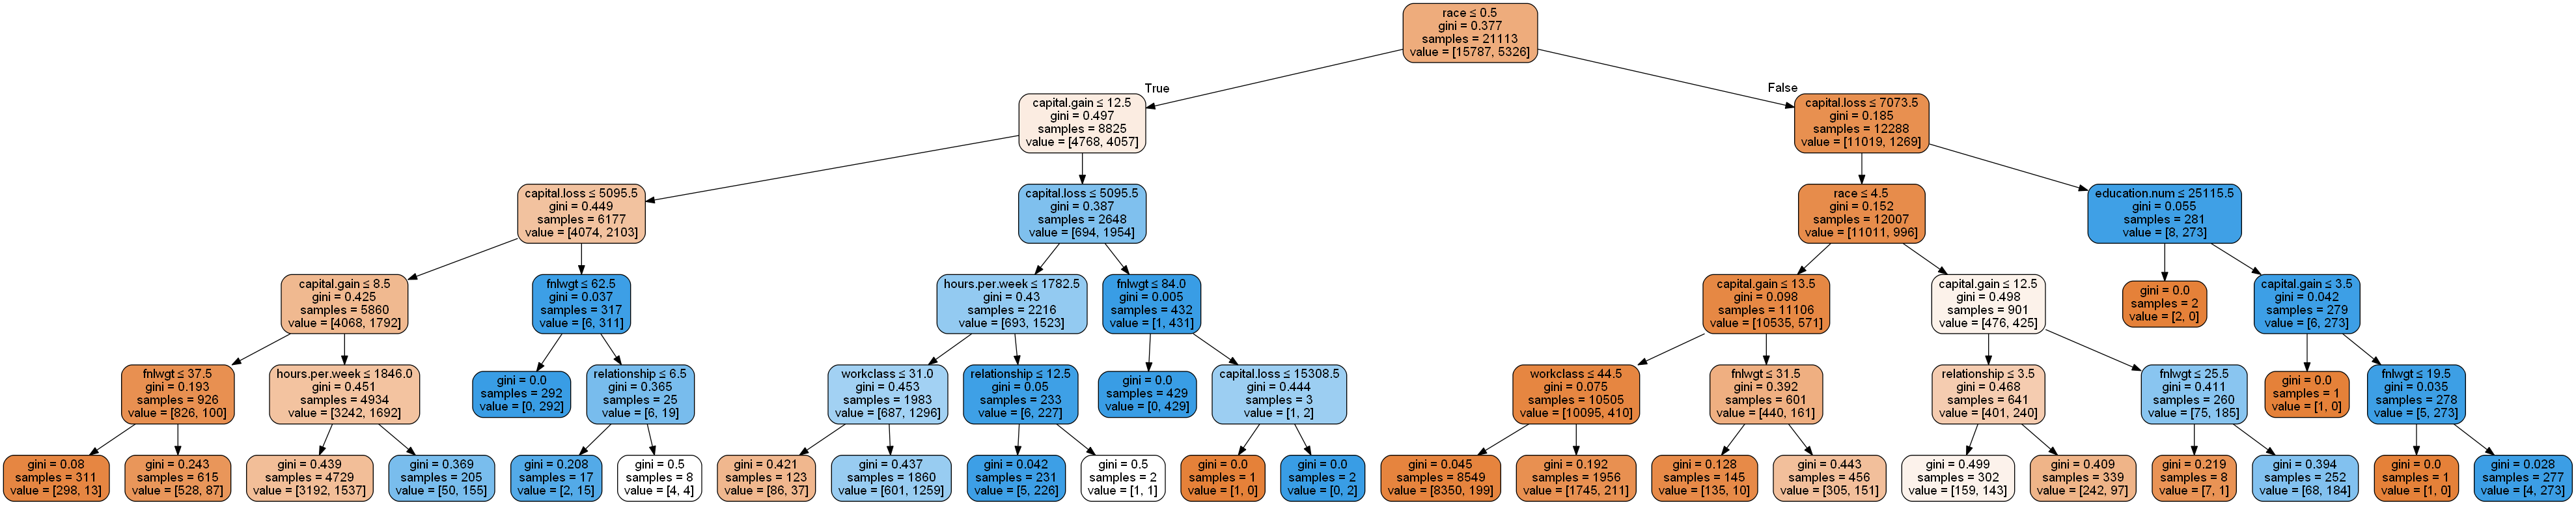

In [46]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [49]:
from sklearn.preprocessing import LabelEncoder
k = preprocessing.LabelEncoder()
for k in label.columns:
    b = label[k][1]
    if isinstance(b,str) == True:
        print(k)
        uni = label[k].unique()
        enc = LabelEncoder().fit(uni)
        encoded = enc.transform(uni)
        decoded = enc.inverse_transform(encoded)
        print(pd.DataFrame({'digits': list(encoded),'represent':list(decoded)}))

workclass
   digits         represent
0       0                 ?
1       4           Private
2       7         State-gov
3       1       Federal-gov
4       6  Self-emp-not-inc
5       5      Self-emp-inc
6       2         Local-gov
7       8       Without-pay
8       3      Never-worked
education
    digits     represent
0       11       HS-grad
1       15  Some-college
2        5       7th-8th
3        0          10th
4       10     Doctorate
5       14   Prof-school
6        9     Bachelors
7       12       Masters
8        1          11th
9        7    Assoc-acdm
10       8     Assoc-voc
11       3       1st-4th
12       4       5th-6th
13       2          12th
14       6           9th
15      13     Preschool
marital.status
   digits              represent
0       6                Widowed
1       0               Divorced
2       5              Separated
3       4          Never-married
4       2     Married-civ-spouse
5       3  Married-spouse-absent
6       1      Married-AF-spo

In [48]:
label =pd.read_csv('adult_dataset.csv')

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = { 'max_depth': range(1,80)}

dtree = DecisionTreeClassifier(criterion='gini',random_state=100)

tree = GridSearchCV(dtree,parameters,cv = n_folds, scoring='accuracy',return_train_score=True)

tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 80)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [51]:
scores = tree.cv_results_

h = pd.DataFrame(scores)

In [52]:
h.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008801,0.001585,0.002397,0.001957,1,{'max_depth': 1},0.747633,0.747810,0.747750,0.747750,...,0.747738,0.000058,79,0.747765,0.747721,0.747735,0.747735,0.747735,0.747738,0.000014
1,0.014375,0.001969,0.001604,0.001965,2,{'max_depth': 2},0.812027,0.818849,0.820464,0.825675,...,0.819969,0.004590,16,0.821955,0.820249,0.819845,0.818542,0.819253,0.819969,0.001148
2,0.019179,0.003895,0.000798,0.001597,3,{'max_depth': 3},0.828362,0.834478,0.834439,0.836570,...,0.834273,0.003188,12,0.836047,0.834517,0.834468,0.833758,0.833758,0.834510,0.000836
3,0.020770,0.001598,0.001598,0.001957,4,{'max_depth': 4},0.832386,0.841108,0.842492,0.842729,...,0.840193,0.003944,9,0.841672,0.839432,0.845006,0.838908,0.845421,0.842088,0.002719
4,0.024769,0.001596,0.001597,0.001956,5,{'max_depth': 5},0.834044,0.847975,0.847229,0.842729,...,0.843888,0.005272,7,0.844337,0.847010,0.849328,0.841572,0.849683,0.846386,0.003075
5,0.028763,0.001570,0.001597,0.001956,6,{'max_depth': 6},0.845407,0.848923,0.848887,0.848887,...,0.847582,0.001617,1,0.850672,0.850681,0.852999,0.848854,0.852407,0.851123,0.001464
6,0.032750,0.001585,0.001598,0.001957,7,{'max_depth': 7},0.846117,0.848923,0.849124,0.849124,...,0.847535,0.001944,3,0.855054,0.854292,0.856314,0.854064,0.855544,0.855054,0.000823
7,0.035152,0.001598,0.003197,0.001598,8,{'max_depth': 8},0.843277,0.848686,0.843913,0.849124,...,0.846493,0.002436,5,0.860679,0.857963,0.860754,0.857972,0.859215,0.859317,0.001231
8,0.042342,0.001956,0.001598,0.001957,9,{'max_depth': 9},0.843040,0.847739,0.848413,0.852203,...,0.847582,0.002961,1,0.867843,0.863114,0.868214,0.862767,0.864306,0.865249,0.002329
9,0.042343,0.001957,0.002398,0.001958,10,{'max_depth': 10},0.842093,0.849159,0.847466,0.847466,...,0.846824,0.002446,4,0.874711,0.872351,0.876206,0.871056,0.870168,0.872898,0.002253


In [53]:
h[['mean_test_score','mean_train_score']][h['rank_test_score']==h['rank_test_score'].min()]

,mean_test_score,mean_train_score
5,0.847582,0.851123
8,0.847582,0.865249


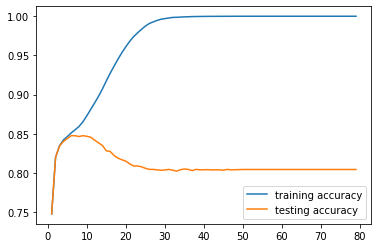

In [54]:
plt.figure()
plt.plot(scores['param_max_depth'],
        scores['mean_train_score'],
        label = 'training accuracy')
plt.plot(scores['param_max_depth'],
        scores['mean_test_score'],
        label = 'testing accuracy')
plt.legend()
plt.show()

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_fold = 5

dtree = DecisionTreeClassifier(criterion='gini',random_state=100)
parameter = {'min_samples_leaf' : range(10,200,5)}
search = GridSearchCV(dtree,parameter,cv= n_fold, return_train_score=True, scoring='accuracy')

search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(10, 200, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [56]:
search2 = search.cv_results_
pd.DataFrame(search2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059124,0.004668,0.001598,0.001957,10,{'min_samples_leaf': 10},0.832623,0.834951,0.829702,0.840123,...,0.834083,0.003455,38,0.889988,0.888692,0.888757,0.887277,0.889290,0.888801,0.000893
1,0.057535,0.004786,0.003199,0.001600,15,{'min_samples_leaf': 15},0.834991,0.838267,0.837281,0.837518,...,0.837778,0.001879,37,0.879685,0.880403,0.880114,0.877035,0.878634,0.879174,0.001226
2,0.063109,0.004641,0.003199,0.001600,20,{'min_samples_leaf': 20},0.843513,0.841345,0.839176,0.831833,...,0.840998,0.005653,35,0.873705,0.874304,0.874371,0.871529,0.873246,0.873431,0.001037
3,0.067909,0.006676,0.002391,0.001952,25,{'min_samples_leaf': 25},0.840672,0.849396,0.839413,0.842018,...,0.844172,0.004330,26,0.867902,0.869390,0.871233,0.867503,0.869872,0.869180,0.001355
4,0.052723,0.005861,0.003998,0.000006,30,{'min_samples_leaf': 30},0.842803,0.852001,0.842255,0.843202,...,0.846161,0.004210,8,0.867429,0.865246,0.867859,0.863596,0.867740,0.866374,0.001684
5,0.062305,0.012001,0.001591,0.001948,35,{'min_samples_leaf': 35},0.839489,0.850817,0.843913,0.848650,...,0.846587,0.004286,5,0.866363,0.864417,0.866734,0.862175,0.866083,0.865154,0.001687
6,0.050917,0.006978,0.003272,0.001643,40,{'min_samples_leaf': 40},0.841146,0.850107,0.846755,0.854571,...,0.848624,0.004487,1,0.864054,0.863055,0.863714,0.861228,0.864543,0.863319,0.001152
7,0.046867,0.000013,0.000000,0.000000,45,{'min_samples_leaf': 45},0.842803,0.850580,0.846518,0.851018,...,0.848529,0.003391,3,0.861034,0.860036,0.862590,0.860399,0.863714,0.861554,0.001389
8,0.046853,0.000027,0.000000,0.000000,50,{'min_samples_leaf': 50},0.841856,0.850107,0.847939,0.853387,...,0.848624,0.003811,1,0.859731,0.858674,0.861287,0.857557,0.863004,0.860051,0.001922
9,0.043740,0.006249,0.000000,0.000000,55,{'min_samples_leaf': 55},0.841619,0.851764,0.847703,0.849834,...,0.846919,0.003774,4,0.859198,0.857371,0.860695,0.855604,0.859748,0.858523,0.001818


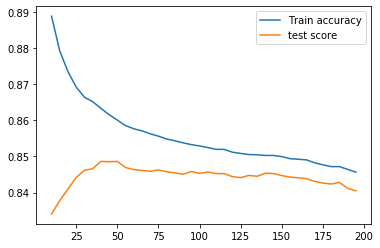

In [57]:
plt.figure()
plt.plot(search2['param_min_samples_leaf'],
        search2['mean_train_score'],
        label = 'Train accuracy')
plt.plot(search2['param_min_samples_leaf'],search2['mean_test_score'],label = 'test score')
plt.legend()
plt.show()

In [58]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_fold = 5

minimumleafs = {'min_samples_leaf':range(5,200,5)}

dtree = DecisionTreeClassifier(criterion='gini',random_state=100)

gd = GridSearchCV(dtree,minimumleafs,return_train_score=True, cv = n_folds, scoring ='accuracy')

gd.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True

In [62]:
scores = gd.cv_results_

pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065617,0.006265,0.000000,0.000000,5,{'min_samples_leaf': 5},0.826705,0.827137,0.819517,0.826149,...,0.823663,0.003695,39,0.915566,0.912789,0.915340,0.912083,0.913149,0.913785,0.001406
1,0.053111,0.007654,0.000000,0.000000,10,{'min_samples_leaf': 10},0.832623,0.834951,0.829702,0.840123,...,0.834083,0.003455,38,0.889988,0.888692,0.888757,0.887277,0.889290,0.888801,0.000893
2,0.053113,0.007663,0.003125,0.006250,15,{'min_samples_leaf': 15},0.834991,0.838267,0.837281,0.837518,...,0.837778,0.001879,37,0.879685,0.880403,0.880114,0.877035,0.878634,0.879174,0.001226
3,0.049998,0.006244,0.003124,0.006249,20,{'min_samples_leaf': 20},0.843513,0.841345,0.839176,0.831833,...,0.840998,0.005653,35,0.873705,0.874304,0.874371,0.871529,0.873246,0.873431,0.001037
4,0.068724,0.012489,0.000000,0.000000,25,{'min_samples_leaf': 25},0.840672,0.849396,0.839413,0.842018,...,0.844172,0.004330,26,0.867902,0.869390,0.871233,0.867503,0.869872,0.869180,0.001355


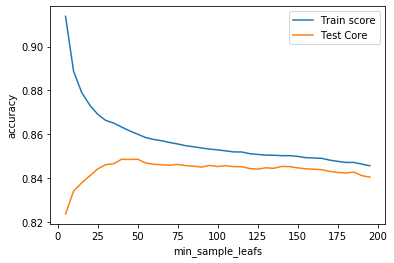

In [66]:
plt.figure()
plt.plot(scores['param_min_samples_leaf'],
    scores['mean_train_score'],
    label = 'Train score')
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_test_score'],
        label = 'Test Core')
plt.xlabel('min_sample_leafs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [74]:
grid = {'min_samples_leaf': range(50,150,50),
       'min_samples_split': range(50,150,50),
       'criterion': ['entropy','gini'],
       'max_depth':range(5,15,5)}
n_folds =5

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(random_state=100)

search = GridSearchCV(dtree,grid,cv=n_folds,return_train_score=True,scoring='accuracy')
search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                       

In [78]:
scores = search.cv_results_

pd.DataFrame(scores).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032766,0.002972,0.001597,0.001956,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,...,0.841804,0.004273,13,0.84404,0.841385,0.842342,0.841158,0.847552,0.843296,0.002358
1,0.029566,0.003210,0.001599,0.001958,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834044,...,0.841804,0.004273,13,0.84404,0.841385,0.842342,0.841158,0.847552,0.843296,0.002358


In [80]:
search.best_score_

0.8514659214701843

In [81]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [85]:
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=100,
                                 max_depth= 3, min_samples_leaf=50,
                                 min_samples_split=50)

In [87]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

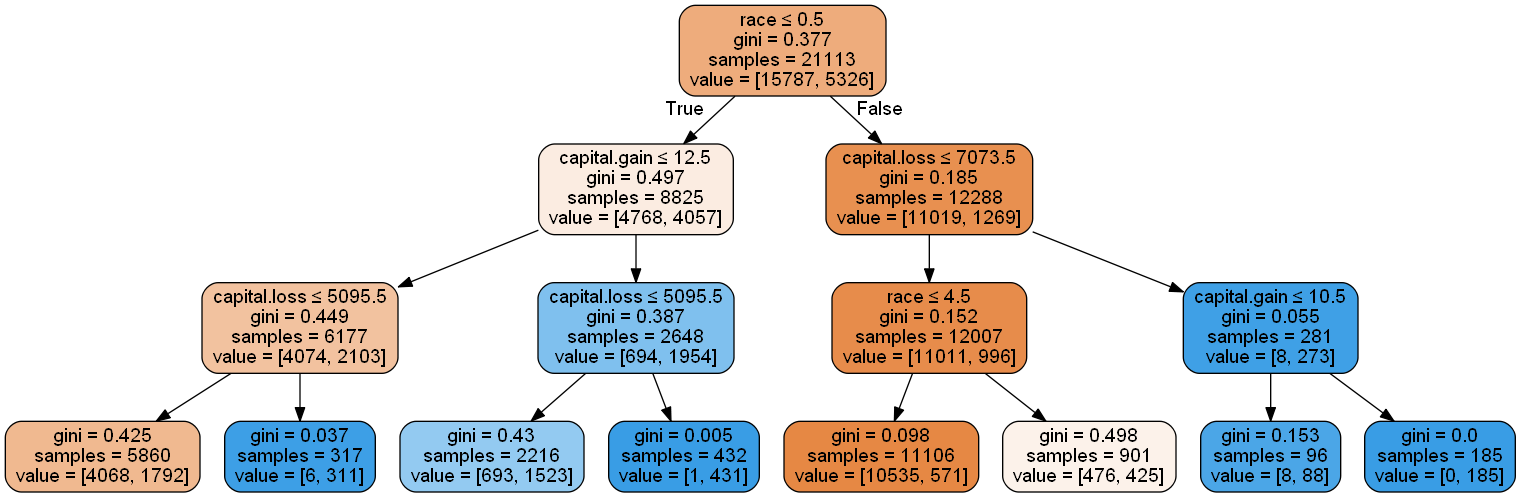

In [88]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [89]:
clf_gini.score(X_test,y_test)

0.8393192617968837

In [90]:
clf_gini.score(X_train,y_train)

0.8344148155165064

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = clf_gini.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



In [93]:
print(confusion_matrix(y_test,y_pred))

[[6564  303]
 [1151 1031]]
